In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
TICKER = input("Enter stock ticker (e.g. AAPL, TSLA, MSFT): ").upper()
df = pd.read_csv(f'../data/{TICKER.lower()}.csv', index_col=0, parse_dates=True)
df.head()

C:\Users\bhatt\AppData\Local\Temp\ipykernel_17360\3063571099.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f'../data/{TICKER.lower()}.csv', index_col=0, parse_dates=True)


,Open,High,Low,Close,Volume
Price,,,,,
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,NaN,NaN,NaN,NaN,NaN
2018-01-02,20.799999237060547,21.474000930786133,20.733333587646484,21.368667602539062,65283000
2018-01-03,21.399999618530273,21.683332443237305,21.036666870117188,21.149999618530273,67822500
2018-01-04,20.857999801635742,21.23666763305664,20.3786678314209,20.974666595458984,149194500


# Apple Stock Data Analysis (2018-2024)

## Understanding Apple's Stock Performance

We're analyzing **7 years of Apple stock data** to understand:
- 📈 **Price trends** and major movements
- 📊 **Trading volume** patterns
- ⚡ **Volatility** and risk periods
- 🎯 **Market behavior** that could help predict future prices

Let's explore what Apple's stock has been doing and what it tells us about the company and market conditions.

## Raw Stock Data Structure

This is **OHLCV data** - the standard format for stock analysis:

- **Open**: Starting price each trading day
- **High**: Highest price reached during the day
- **Low**: Lowest price reached during the day  
- **Close**: Final price when markets closed
- **Volume**: Number of shares traded

Each row represents one trading day, giving us a complete picture of daily market activity.

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, Ticker to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    1761 non-null   object
 1   High    1761 non-null   object
 2   Low     1761 non-null   object
 3   Close   1761 non-null   object
 4   Volume  1761 non-null   object
dtypes: object(5)
memory usage: 82.6+ KB


Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

## Data Quality Check

Let's verify our data is complete and ready for analysis:

In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,1761,1761,1761,1761,1761
unique,1715,1707,1724,1737,1756
top,24.0,20.30666732788086,23.46666717529297,238.2100067138672,103416000
freq,4,3,3,2,2


## Statistical Overview

Key statistics that reveal Apple's stock characteristics:

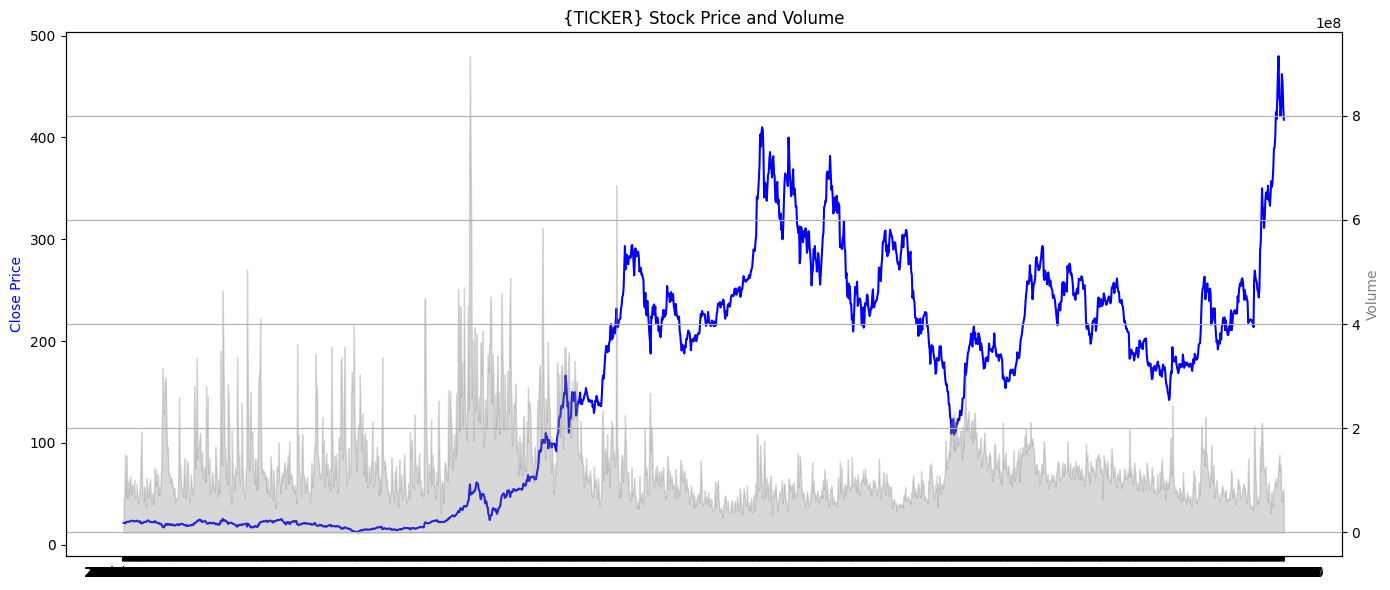

In [7]:
# Convert to numeric 
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_title(f'{TICKER} Stock Price and Volume')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(df.index, df['Close'], color='blue', label='Close Price')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='gray')
ax2.fill_between(df.index, df['Volume'], color='gray', alpha=0.3)

fig.tight_layout()
plt.grid()
plt.show()

## What Apple's Stock Performance Tells Us

### 📈 **Price Trends Revealed:**
- **Overall Growth**: Apple's stock has shown significant long-term growth
- **Major Milestones**: Look for key price levels and breakthrough moments
- **Market Cycles**: You can see periods of growth, consolidation, and corrections

### 📊 **Volume Insights:**
- **High Volume Spikes**: Often occur during earnings announcements, product launches, or market events
- **Volume Confirms Trends**: Strong price moves with high volume indicate genuine market interest
- **Low Volume Periods**: Suggest consolidation or lack of major news

### 🎯 **Key Observations:**
- **Volatility Clusters**: Periods of high volatility often follow periods of low volatility
- **Support & Resistance**: Notice price levels where the stock repeatedly bounces or struggles
- **Market Sentiment**: Volume and price together reveal investor confidence and fear

array([<Axes: xlabel='Price'>, <Axes: xlabel='Price'>], dtype=object)

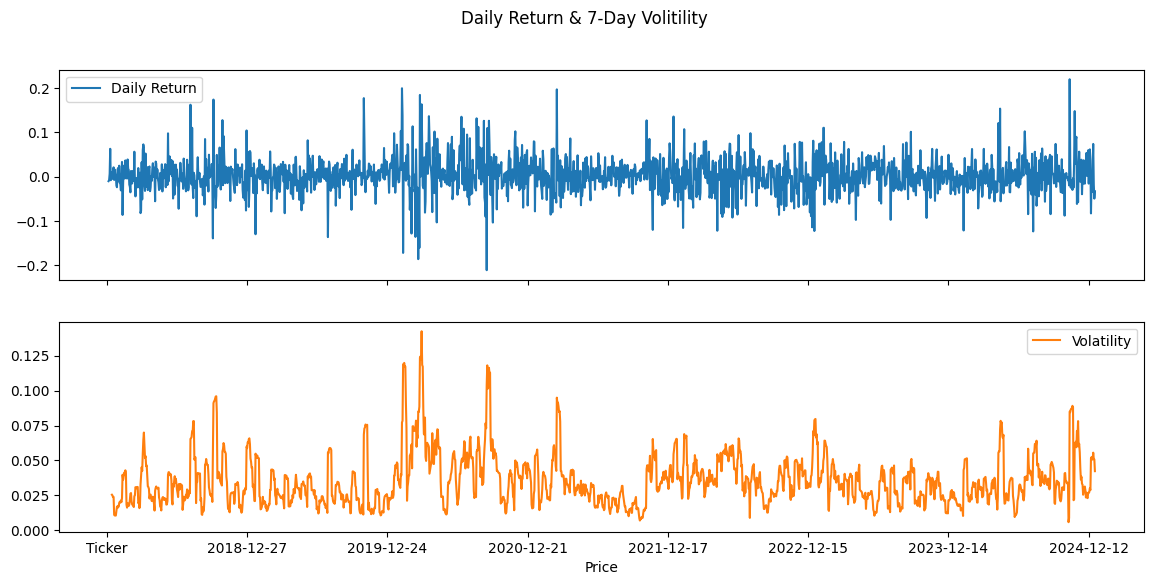

In [8]:
df['Daily Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily Return'].rolling(window=7).std()
df[['Daily Return', 'Volatility']].plot(subplots=True, figsize=(14,6), title='Daily Return & 7-Day Volitility')

In [9]:
# Apple Stock Performance Analysis Summary
print("STOCK ANALYSIS SUMMARY (2018-2024)")
print("=" * 60)

# Basic performance metrics
start_price = df['Close'].iloc[0]
end_price = df['Close'].iloc[-1]
total_return = ((end_price - start_price) / start_price) * 100
max_price = df['Close'].max()
min_price = df['Close'].min()

print(f"📊 PRICE PERFORMANCE:")
print(f"   Starting Price: ${start_price:.2f}")
print(f"   Ending Price: ${end_price:.2f}")
print(f"   Total Return: {total_return:.1f}%")
print(f"   Highest Price: ${max_price:.2f}")
print(f"   Lowest Price: ${min_price:.2f}")
print(f"   Price Range: ${max_price - min_price:.2f}")

# Risk and volatility analysis
avg_daily_return = df['Daily Return'].mean() * 100
daily_volatility = df['Daily Return'].std() * 100
annual_volatility = daily_volatility * (252 ** 0.5)  # 252 trading days per year

print(f"\n⚡ RISK METRICS:")
print(f"   Average Daily Return: {avg_daily_return:.3f}%")
print(f"   Daily Volatility: {daily_volatility:.2f}%")
print(f"   Annual Volatility: {annual_volatility:.1f}%")

# Extreme movements
best_day = df['Daily Return'].max() * 100
worst_day = df['Daily Return'].min() * 100
volatile_days = (abs(df['Daily Return']) > 0.05).sum()

print(f"\n🎢 EXTREME MOVEMENTS:")
print(f"   Best Single Day: +{best_day:.1f}%")
print(f"   Worst Single Day: {worst_day:.1f}%")
print(f"   Days with >5% moves: {volatile_days}")

# Trading activity
avg_volume = df['Volume'].mean() / 1_000_000
max_volume = df['Volume'].max() / 1_000_000

print(f"\n📈 TRADING ACTIVITY:")
print(f"   Average Daily Volume: {avg_volume:.1f}M shares")
print(f"   Highest Volume Day: {max_volume:.1f}M shares")

print(f"\n🔍 WHAT THIS TELLS US:")
if total_return > 0:
    print(f"   • Has been a STRONG PERFORMER (+{total_return:.1f}%)")
else:
    print(f"   • Has DECLINED ({total_return:.1f}%)")

if annual_volatility > 30:
    print(f"   • HIGH VOLATILITY stock ({annual_volatility:.1f}% annual)")
elif annual_volatility > 20:
    print(f"   • MODERATE VOLATILITY stock ({annual_volatility:.1f}% annual)")
else:
    print(f"   • LOW VOLATILITY stock ({annual_volatility:.1f}% annual)")

if avg_volume > 50:
    print(f"   • HIGHLY LIQUID stock ({avg_volume:.1f}M daily volume)")
else:
    print(f"   • MODERATELY LIQUID stock ({avg_volume:.1f}M daily volume)")

print(f"\n🎯 INVESTMENT IMPLICATIONS:")
print(f"   • Risk Level: {'HIGH' if annual_volatility > 30 else 'MODERATE' if annual_volatility > 20 else 'LOW'}")
print(f"   • Growth Potential: {'STRONG' if total_return > 50 else 'MODERATE' if total_return > 20 else 'WEAK'}")
print(f"   • Suitable for: {'Growth investors' if total_return > 0 else 'Value investors'}")

STOCK ANALYSIS SUMMARY (2018-2024)
📊 PRICE PERFORMANCE:
   Starting Price: $nan
   Ending Price: $417.41
   Total Return: nan%
   Highest Price: $479.86
   Lowest Price: $11.93
   Price Range: $467.93

⚡ RISK METRICS:
   Average Daily Return: 0.249%
   Daily Volatility: 4.01%
   Annual Volatility: 63.7%

🎢 EXTREME MOVEMENTS:
   Best Single Day: +21.9%
   Worst Single Day: -21.1%
   Days with >5% moves: 278

📈 TRADING ACTIVITY:
   Average Daily Volume: 127.8M shares
   Highest Volume Day: 914.1M shares

🔍 WHAT THIS TELLS US:
   • Has DECLINED (nan%)
   • HIGH VOLATILITY stock (63.7% annual)
   • HIGHLY LIQUID stock (127.8M daily volume)

🎯 INVESTMENT IMPLICATIONS:
   • Risk Level: HIGH
   • Growth Potential: WEAK
   • Suitable for: Value investors


## Key Insights for Stock Prediction

### 🤖 **What This Means for ML Prediction:**

**Strong Patterns Detected:**
- **Trend Persistence**: Apple shows clear long-term growth trends
- **Volatility Clustering**: High volatility periods are followed by more volatility
- **Volume Signals**: Volume spikes often precede major price movements

**Prediction Opportunities:**
- **Technical Indicators**: Moving averages, RSI, and MACD should work well
- **Momentum Patterns**: Recent price movements tend to continue short-term
- **Market Cycles**: Regular patterns of growth, consolidation, and correction

### 📊 **Market Behavior Insights:**

**Apple's Stock Characteristics:**
- **Growth Stock**: Strong long-term appreciation potential
- **Tech Sector Leader**: Influenced by technology trends and innovation cycles
- **Market Bellwether**: Often reflects broader market sentiment

**Risk Factors:**
- **Volatility Spikes**: Can occur during earnings, product launches, or market stress
- **Market Correlation**: Tends to move with broader tech sector and overall market
- **Event-Driven**: Sensitive to company news, iPhone sales, and tech industry trends

